In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import zip_longest
SEED = 8

In [43]:
class SingleLayerSNN:
    
    def __init__(self, inputs, weights, trainings, Cm=4, Rm=5, V_thresh=30, V_rest=-65, V_spike=80, dT=0.02):
        """
        Runs a LIF simulation on neuron and returns outputted voltage

                Parameters:
                        inputs (double[][][]): A 3d numpy array of the input voltages per timestep
                        weights (double[]): A numpy array of initial weights
                        outputs (double[][][]): A 3d numpy array of the output voltages per timestep used for teaching neuron
                Returns:
                        None
        """

        self.inputs = inputs
        self.weights = weights
        self.trainings = trainings
        self.Cm = Cm
        self.Rm = Rm
        self.V_thresh = V_thresh
        self.V_rest = V_rest
        self.V_spike = V_spike
        self.dT = dT
        self._LIF_spikes = 0                    
        
    def LIF(self, I):
        """
        Runs a LIF simulation on neuron and returns outputted voltage

                Parameters:
                        I (double[]): A numpy array of input voltages in mV

                Returns:
                        V (double[]): A numpy array of the output voltages in mV
        """
        total_time = (I.size) * self.dT

        # an array of time
        time = np.arange(0, total_time, self.dT)

        # default voltage list set to resting volatage of -65mV
        V = (self.V_rest) * np.ones(len(time))

        did_spike = False

        # function member variable to track spikes
        self._LIF_spikes = 0

        for t in range(len(time)):
            # using "I - V(t)/Rm = Cm * dV/dT"
            dV = (I[t] - (V[t - 1] - self.V_rest) / self.Rm) / self.Cm

            # reset membrane potential if neuron spiked last tick
            if did_spike:
                V[t] = self.V_rest + dV * self.dT
            else:
                V[t] = V[t - 1] + dV * self.dT

            # check if membrane voltage exceeded threshold (spike)
            if V[t] > self.V_thresh:
                did_spike = True
                # set the last step to spike value
                V[t] = self.V_spike
                self._LIF_spikes += 1
            else:
                did_spike = False

        return V
    
    def voltage_to_output(self, V_input):
        V_output = np.array([])
        for v in V_input:
            V_output = np.append(V_output, 0 if v < self.V_spike else self.V_spike)
        return V_output
    
    # returns the voltages of input and output neurons
    def feed_forward(self, inputs, trainings=None):
        all_input_voltages = []
        all_output_voltages = []
        
        for input_set, training_set in zip_longest(inputs, trainings):
            input_voltages = []
            for V_input in input_set:
                input_voltages.append(self.LIF(V_input))
                
            output_inputs = []
            input_outputs = [] # DEBUG ONLY
            for weight_set in weights.T:
                weighted_sum = np.zeros(len(input_set[0]))
                for V_input, weight in zip(input_voltages, weight_set):
                    # filter for spikes b/c a neuron only outputs if it spikes
                    input_output = self.voltage_to_output(V_input)
                    input_outputs.append(input_output) # DEBUG ONLY
                    weighted = input_output * weight
                    weighted_sum = np.add(weighted_sum, weighted)
            
                output_inputs.append(weighted_sum)
            
            input_voltages = np.array(input_voltages)
            input_outputs = np.array(input_outputs)
            output_inputs = np.array(output_inputs)
            
            print('input_voltages:')
            print(input_voltages)
            print('input_outputs:')
            print(input_outputs)
            print('output_inputs:')
            print(output_inputs)
            print('training_set:')
            print(training_set)
            
            all_input_voltages.append(input_voltages)
            
            # inject training voltage if exists
            if isinstance(training_set, (list, np.ndarray)):
                for i, (output_input, training_input) in enumerate(zip(output_inputs, training_set)):
                    if isinstance(training_input, (list, np.ndarray)):
                        padded_training_input = np.pad(training_input, (0, len(output_inputs) - len(training_set)), "constant")
                        output_inputs[i] = output_input + padded_training_input
                
            print('output_inputs after injecting training current')
            print(output_inputs)
        
            # run LIF on output neurons
            output_voltages = []
            for V_input in output_inputs:
                output_voltages.append(self.LIF(V_input))
                            
            output_voltages = np.array(output_voltages)
            all_output_voltages.append(output_voltages)
            
            print('output_voltages:')
            print(output_voltages)
        
        all_input_voltages = np.array(all_input_voltages)
        all_output_voltages = np.array(all_output_voltages)
        
        return all_input_voltages, all_output_voltages
                
                    
    def train(self, epochs=100):
        for epoch in range(epochs):
            print(f'Epoch: {epoch + 1}')
            
            all_input_voltages, all_output_voltages = self.feed_forward(self.inputs, self.trainings)
            
            print()
            print('------------------------------------------------')
            print('all_input_voltages:')
            print(all_input_voltages)
            print('all_output_voltages:')
            print(all_output_voltages)
            
            # apply learning rule
            for input_voltages in all_input_voltages:
                print('input_voltages', input_voltages)
                for input_voltage_set in input_voltages:
                    print('input_voltage_set', input_voltage_set)
                    # chunk data to num spikes per second
                    spikes_per_sec = []
                    for V_input in input_voltage_set:
                        pass
                        
            
            # plot data
            for i, (input_voltages, output_voltages) in enumerate(zip(all_input_voltages, all_output_voltages)):
                plt.figure(figsize=(20,10))
                plt.suptitle(f'Input: {i + 1}', fontsize=18)
                for input_voltage in input_voltages:
                    plt.plot(input_voltage, 'b:', alpha=.5)

                for output_voltage in output_voltages:
                    plt.plot(output_voltage, 'r--', alpha=.5)
                
            plt.show()
            


Epoch: 1
input_voltages:
[[-63.         -61.01       -59.02995    ... -49.9772199  -48.0523338
  -46.13707213]
 [-65.         -65.         -65.         ... -65.         -65.
  -65.        ]
 [-63.         -61.01       -59.02995    ... -49.9772199  -48.0523338
  -46.13707213]
 [-65.         -65.         -65.         ... -65.         -65.
  -65.        ]]
input_outputs:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
output_inputs:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
training_set:
[[80 80 80 ... 80 80 80]
 [80 80 80 ... 80 80 80]]
output_inputs after injecting training current
[[80. 80. 80. ... 80. 80. 80.]
 [80. 80. 80. ... 80. 80. 80.]]
output_voltages:
[[-63.         -61.01       -59.02995    ... -49.9772199  -48.0523338
  -46.13707213]
 [-63.         -61.01       -59.02995    ... -49.9772199  -48.0523338
  -46.13707213]]
input_voltages:
[[-65. -65. -65. ... -65. 

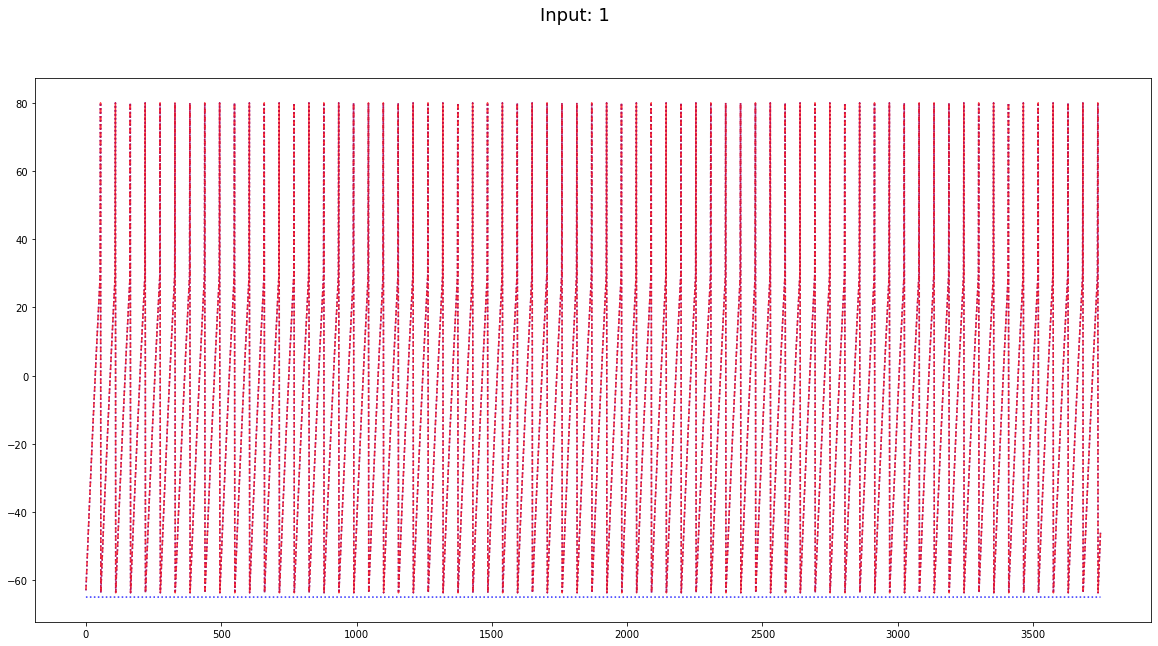

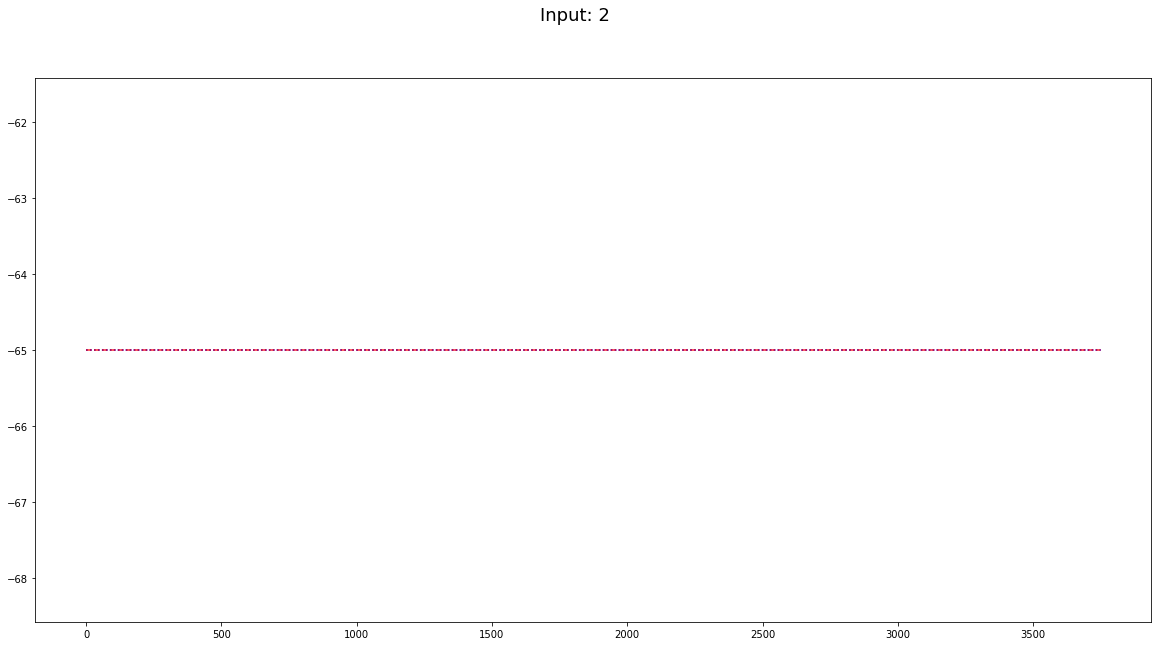

In [44]:
units_of_time = 3750
inputs = np.array([
    [[80] * units_of_time, [0] * units_of_time, [80] * units_of_time, [0] * units_of_time],
    [[0] * units_of_time, [0] * units_of_time, [0] * units_of_time, [0] * units_of_time],
])

weights = np.array([
    [1, 1], 
    [1, 1],
    [1, 1],
    [1, 1],
])

# current that gets injected to the output neurons
trainings = np.array([
    [[80] * units_of_time, [80] * units_of_time],
    [[0] * units_of_time, [0] * units_of_time],
])

and_network = SingleLayerSNN(inputs=inputs, weights=weights, trainings=trainings, dT=0.1)

and_network.train(1)


In [32]:
a = np.array([1, 2, 3, 4])
b = np.array([1, 2])
b = np.pad(b, (0, len(a) - len(b)), "constant")

print(a + b)

for x, y in zip_longest(a, b):
    print(x, y)

[2 4 3 4]
1 1
2 2
3 0
4 0
